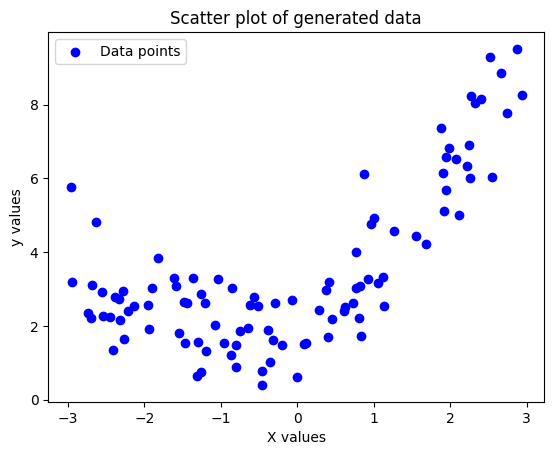

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y, color='blue', label='Data points')

# Add labels and title
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Scatter plot of generated data')
plt.legend()
plt.show()

In [2]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]


array([2.11647736])

In [3]:
X_poly[0]

array([2.11647736, 4.4794764 ])

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.16787423]), array([[0.92899406, 0.50639873]]))

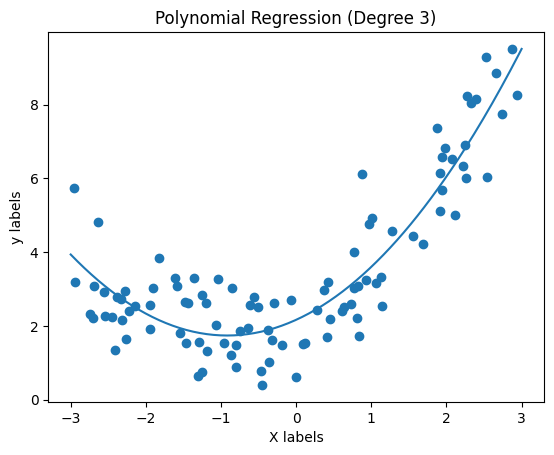

In [5]:
X_new = np.linspace(-3,3,200).reshape(-1,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.scatter(X,y)
plt.plot(X_new, y_new)
plt.xlabel('X labels')
plt.ylabel('y labels')
plt.title("Polynomial Regression (Degree 3)")
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
     

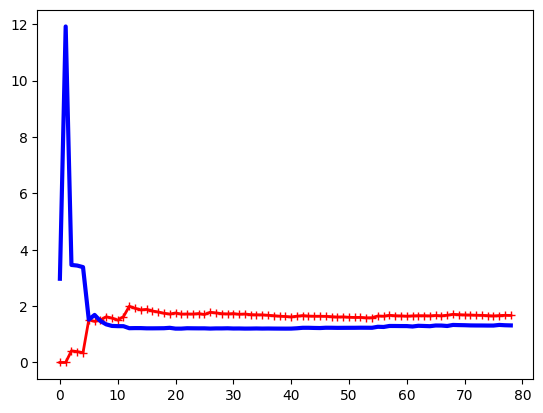

In [7]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


In [8]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.90832022])

In [9]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.90122828])

In [10]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.85473899])

In [11]:
from sklearn.linear_model import ElasticNet
elactic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elactic_net.fit(X, y)
elactic_net.predict([[1.5]])


array([4.85918098])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Split your data (X, y) into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare the polynomial + scaling pipeline
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

# Transform both training and validation data
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off 
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)




c:\Users\richa\$ML_PATH\env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\richa\$ML_PATH\env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\richa\$ML_PATH\env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\richa\$ML_PATH\env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

c:\Users\richa\$ML_PATH\env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\richa\$ML_PATH\env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\richa\$ML_PATH\env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\richa\$ML_PATH\env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

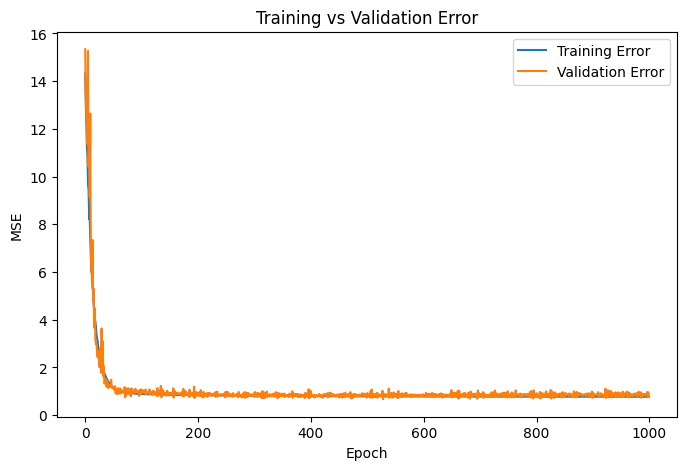

In [15]:
import matplotlib.pyplot as plt

train_errors = []
val_errors = []

sgd_reg = SGDRegressor(
    max_iter=1,
    tol=None,
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.0005
)

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)

    # Predictions
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)

    # Compute errors
    train_error = mean_squared_error(y_train, y_train_predict)
    val_error = mean_squared_error(y_val, y_val_predict)

    train_errors.append(train_error)
    val_errors.append(val_error)

# ---- Plot Learning Curves ----
plt.figure(figsize=(8,5))
plt.plot(train_errors)
plt.plot(val_errors)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Training vs Validation Error")
plt.legend(["Training Error", "Validation Error"])
plt.show()


c:\Users\richa\$ML_PATH\env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\richa\$ML_PATH\env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\richa\$ML_PATH\env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\richa\$ML_PATH\env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Early stopping at epoch 76


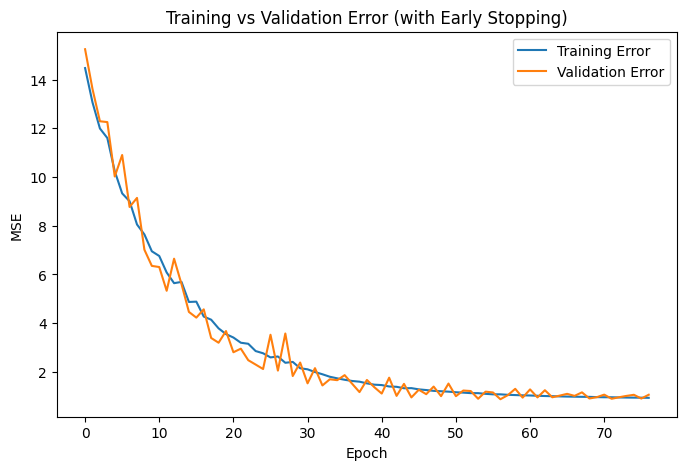

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial + Scaling pipeline
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# SGD Regressor
sgd_reg = SGDRegressor(
    max_iter=1,
    tol=None,
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.0005
)

train_errors = []
val_errors = []

minimum_val_error = float("inf")
best_model = None
patience = 20       # stop if no improvement in 20 epochs
wait = 0

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)

    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)

    train_error = mean_squared_error(y_train, y_train_predict)
    val_error = mean_squared_error(y_val, y_val_predict)

    train_errors.append(train_error)
    val_errors.append(val_error)

    # Early Stopping logic
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_model = clone(sgd_reg)
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

# ---- Plot ----
plt.figure(figsize=(8,5))
plt.plot(train_errors)
plt.plot(val_errors)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Training vs Validation Error (with Early Stopping)")
plt.legend(["Training Error", "Validation Error"])
plt.show()
